In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr,kendalltau
np.random.seed(42)

####  To study correlation of monotonically increasing dataset with slight exponential shape

### what is monotonic realtionship?

##### A monotonic relationship refers to a consistent and predictable change in one variable with respect to another variable. In a monotonic relationship, as the value of one variable increases (or decreases), the value of the other variable also consistently increases (or decreases), although not necessarily at a constant rate. 

There are two types of monotonic relationships:

1. Monotonic Increasing: In a monotonic increasing relationship, as the values of one variable increase, the values of the other variable also increase. This means that when you plot the relationship on a graph, the points generally move in an upward direction.

Example: Let's consider the relationship between the number of hours studied for an exam and the corresponding exam scores. In a monotonic increasing relationship, as the number of hours studied increases, the exam scores tend to increase as well.

2. Monotonic Decreasing: In a monotonic decreasing relationship, as the values of one variable increase, the values of the other variable decrease. This means that when you plot the relationship on a graph, the points generally move in a downward direction.

Example: Suppose you are measuring the price of a product and the corresponding demand for that product. In a monotonic decreasing relationship, as the price increases, the demand tends to decrease.

It's important to note that in a monotonic relationship, the rate of change may not be constant. The key characteristic is that the direction of change is consistent. However, a monotonic relationship does not imply a linear relationship. The relationship can be nonlinear, meaning the rate of change may vary at different points along the relationship.

Monotonic relationships are commonly analyzed using nonparametric correlation measures like Spearman's rank correlation or Kendall's rank correlation coefficient. These measures quantify the strength and direction of the monotonic relationship between variables, even when the relationship is not linear.

In [2]:
x_mono = np.linspace(0, 10, 100)
y_mono = np.exp(x_mono/4) + np.random.normal(0,0.2,100)

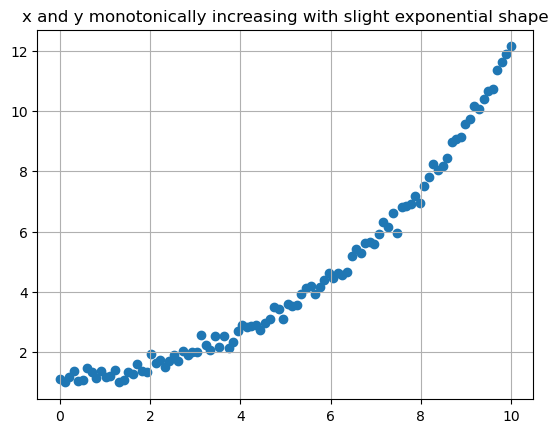

In [3]:
# scatter plot
plt.scatter(x_mono,y_mono)
plt.title('x and y monotonically increasing with slight exponential shape')
plt.grid(True)
plt.show()

In [4]:
# Printing the correlation coefficients
pearson_coeff , _ = pearsonr(x_mono,y_mono)
spearman_coeff , _ = spearmanr(x_mono,y_mono)
kendall_coeff , _ = kendalltau(x_mono,y_mono)

print("Monotonic Dataset:")
print("Pearson correlation:", pearson_coeff)
print("Spearman correlation:", spearman_coeff)
print("Kendall Correlation :",kendall_coeff)


Monotonic Dataset:
Pearson correlation: 0.9510617658455025
Spearman correlation: 0.9932673267326732
Kendall Correlation : 0.9462626262626265


#### To study correlation of linear dataset

In [5]:
x_linear = np.linspace(0, 10, 100)
y_linear = 2 * x_linear + np.random.normal(0,0.5,100)

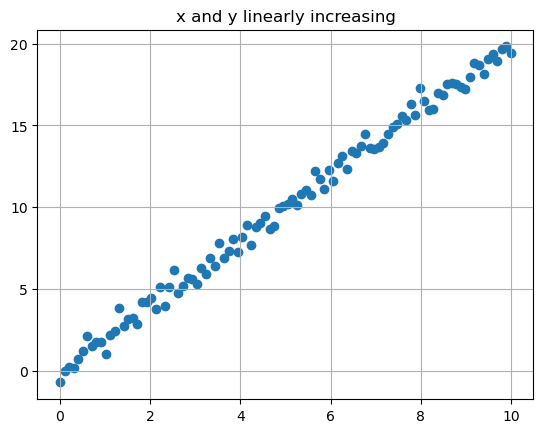

In [6]:
# scatter plot
plt.scatter(x_linear,y_linear)
plt.title('x and y linearly increasing')
plt.grid(True)
plt.show()

In [7]:
# Printing the correlation coefficients
pearson_coeff_lin , _ = pearsonr(x_linear,y_linear)
spearman_coeff_lin , _ = spearmanr(x_linear,y_linear)
kendall_coeff_lin , _ = kendalltau(x_linear,y_linear)

print("Linear Dataset:")
print("Pearson correlation:", pearson_coeff_lin)
print("Spearman correlation:", spearman_coeff_lin)
print("Kendall Correlation :",kendall_coeff_lin)


Linear Dataset:
Pearson correlation: 0.9967101676909619
Spearman correlation: 0.9969036903690367
Kendall Correlation : 0.9579797979797982


#### To study correlation of linear dataset with some outliers

In [8]:
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0,0.1, size=len(x))

# Adding extreme outliers
outlier_indices = [10, 20, 30,12,28]  # Indices where outliers will be inserted
outlier_values = [22, 25,23,24,27]  # Values of the outliers
y[outlier_indices] = outlier_values

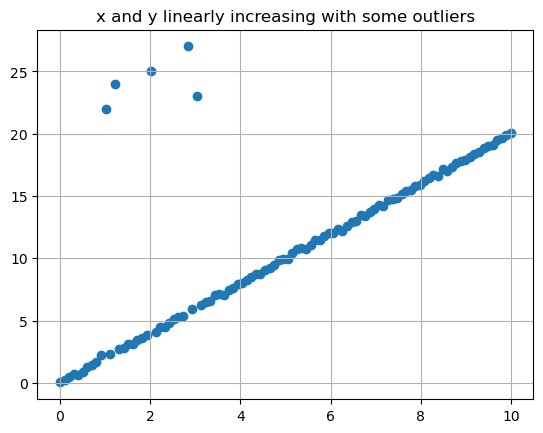

In [9]:
# scatter plot
plt.scatter(x,y)
plt.title('x and y linearly increasing with some outliers')
plt.grid(True)
plt.show()

In [10]:
# Printing the correlation coefficients
pearson_coeff_lin_out , _ = pearsonr(x,y)
spearman_coeff_lin_out , _ = spearmanr(x,y)
kendall_coeff_lin_out , _ = kendalltau(x,y)

print("Linear Dataset with outliers:")
print("Pearson correlation:", pearson_coeff_lin_out)
print("Spearman correlation:", spearman_coeff_lin_out)
print("Kendall Correlation :",kendall_coeff_lin_out)


Linear Dataset with outliers:
Pearson correlation: 0.7449467410050216
Spearman correlation: 0.8092529252925291
Kendall Correlation : 0.838787878787879


###### The Spearman correlation is less sensitive than the Pearson correlation to **strong outliers** that are in the tails of both samples. That is because Spearman's ρ limits the outlier to the value of its rank.

#### When to use which correlation technique?

##### The choice of correlation measure depends on the type of data you have and the nature of the relationship you want to analyze. Here's a summary of when to use different correlation measures:

1. Pearson's correlation coefficient:
   - Use when: 
     - Variables are measured on a continuous scale.
     - The relationship between variables is expected to be linear.
     - The data does not have significant outliers.
   - Note: Pearson's correlation assumes that the relationship between variables is linear and follows certain assumptions, such as normality and homoscedasticity (equal variance).

2. Spearman's rank correlation coefficient:
   - Use when:
     - Variables are measured on an ordinal scale or when the assumptions of Pearson's correlation are not met.
     - The relationship between variables is expected to be monotonic (increasing or decreasing), but not necessarily linear.
     - There may be outliers in the data.
   - Note: Spearman's correlation focuses on the ranks of the variables rather than their exact values, making it suitable for analyzing non-linear relationships or variables measured on ordinal scales.

3. Kendall's rank correlation coefficient:
   - Use when:
     - Variables are measured on an ordinal scale or when the assumptions of Pearson's correlation are not met.
     - The relationship between variables is expected to be monotonic.
     - Tied ranks or tied observations are present in the data.
   - Note: Kendall's correlation is particularly useful when dealing with tied observations and can provide accurate measures of association in the presence of ties.

In general, if you have data measured on a continuous scale and expect a linear relationship, Pearson's correlation is often a suitable choice. If the variables are ordinal or the relationship is expected to be monotonic, Spearman's or Kendall's correlation can be used. Additionally, both Spearman's and Kendall's correlations are robust to outliers and do not rely on parametric assumptions, making them more suitable for analyzing certain types of data.

However, it's important to consider the specific characteristics of your data and the research question at hand when selecting a correlation measure.

#### what is tied observations?


##### Tied observations refer to cases in a dataset where two or more samples have the same value for a particular variable. In other words, there is a "tie" or a "draw" in the rankings of those observations.

Let's consider an example:

Suppose you are conducting a survey on a scale of 1 to 5 to measure customer satisfaction with a product. The dataset includes the following ratings:

```
Customer Satisfaction Ratings: [4, 3, 5, 3, 2, 4, 5, 4, 3, 2]
```

In this dataset, there are tied observations. The ratings 4 and 3 appear multiple times. This means that several customers gave the same ratings, resulting in tied observations.

Tied observations can also occur in other scenarios, such as:

- Sports rankings: In a competition where two or more participants achieve the same score or time, there would be tied rankings.
- Survey responses: When respondents choose the same answer or rating on a Likert scale, it leads to tied observations.
- Exam scores: If multiple students obtain the same score on an exam, there would be tied observations in the dataset.

When calculating correlation coefficients or performing statistical analyses, tied observations can impact the results. Both Spearman's rank correlation coefficient and Kendall's rank correlation coefficient are designed to handle tied observations and provide accurate measures of the association between variables.

Spearman's correlation takes into account the average of the ranks for tied observations, while Kendall's correlation directly considers the number of concordant and discordant pairs among tied observations.

Dealing with tied observations is crucial to ensure the appropriate analysis and interpretation of the data, especially when working with ranked or ordinal variables.